In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

import importlib
import lib.ting_utils

importlib.reload(lib.ting_utils)
from lib.ting_utils import getSampledSignal
from lib.ting_utils import getSampledVariation
from lib.ting_utils import getVariationDistribution

In [2]:
datetime_str = '09/19/18 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

print(type(datetime_object))
print(datetime_object)  # printed in default format

<class 'datetime.datetime'>
2018-09-19 13:55:26


In [5]:
df = pd.read_csv('csvs/important_files/1hour_filtered_3DCA95.csv')

In [16]:
df

,data,time
0,57.746656,12:32:00.086718
1,55.006280,12:32:22.055969
2,54.922222,12:32:43.788800
3,57.168713,12:33:05.401925
4,58.302514,12:33:26.886681
...,...,...
145,65.892476,13:25:32.542550
146,72.014070,13:25:56.154325
147,71.777084,13:26:17.404659
148,66.139733,13:26:39.276838


In [15]:
x = df['date']+' '+df['time']
y = df['data']

KeyError: 'date'

In [8]:
y

0      57.746656
1      55.006280
2      54.922222
3      57.168713
4      58.302514
         ...    
145    65.892476
146    72.014070
147    71.777084
148    66.139733
149    58.006331
Name: data, Length: 150, dtype: float64

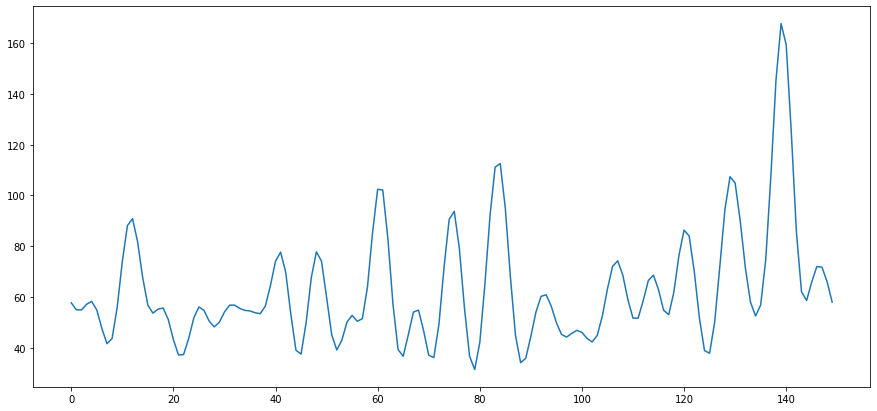

In [9]:
plt.figure(figsize=(15,7))
plt.plot(x, y)

## Get sampled signal

In [10]:
sampled_y = getSampledSignal(y, x, 15, sampling_offset=0)

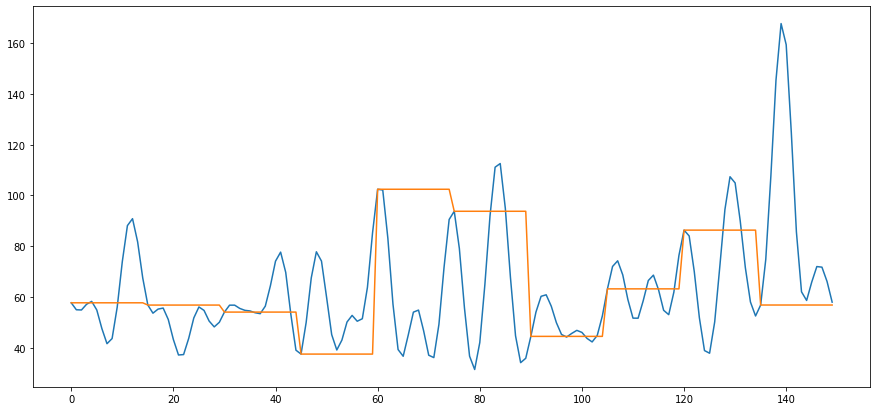

In [11]:
plt.figure(figsize=(15,7))
plt.plot(x, y)
plt.plot(x, sampled_y)

## Get total variation

In [12]:
win_int = (60,90)
for i in range(2, 61, 2):
    print('Interval:',i,getVariationDistribution(y, x, i, window_interval=win_int))

# var_2 = getVariationDistribution(y, x, 2, window_interval=(60,90))
# var_5 = getVariationDistribution(y, x, 5, window_interval=(60,90))
# var_15 = getVariationDistribution(y, x, 15, window_interval=(60,90))
# var_30 = getVariationDistribution(y, x, 30, window_interval=(60,90))
# var_60 = getVariationDistribution(y, x, 60, window_interval=(60,90))

# print(var_2)
# print(var_5)
# print(var_15)
# print(var_30)
# print(var_60)

TypeError: strptime() argument 1 must be str, not int

In [13]:
sample_interval = 15
sampled_ys = []
for i in range(sample_interval):
    sampled_y_offset = getSampledSignal(y, x, sample_interval, sampling_offset=i)
    sampled_ys.append(sampled_y_offset)
    
    var = getSampledVariation(y, x, sample_interval, sampling_offset=i)
    
    print('Offset:',i,'Variation:',var)

TypeError: getSampledVariation() missing 1 required positional argument: 'index_window'

IndexError: list index out of range

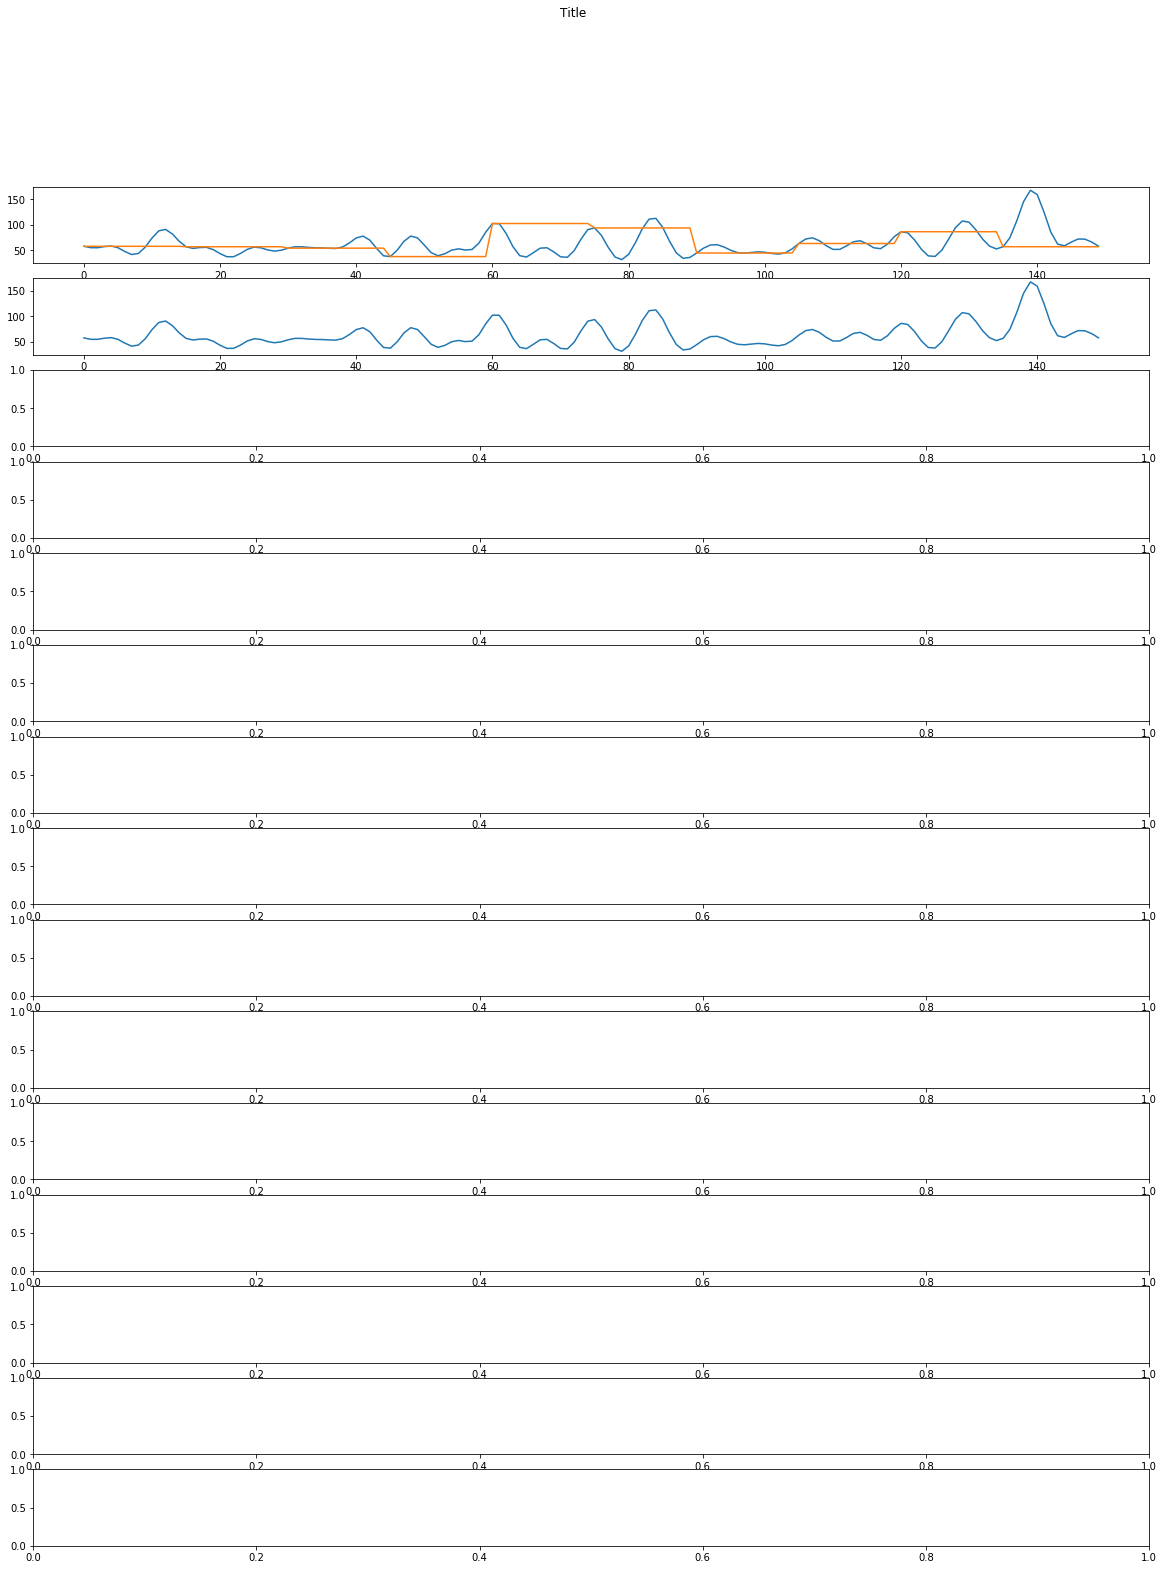

In [14]:
## VISUALISATION

# Plot
fig, axs = plt.subplots(sample_interval, figsize=(20,25))
fig.suptitle('Title')

for i in range(sample_interval):
    axs[i].plot(x, y)
    axs[i].plot(x, sampled_ys[i])

#axs[2].set_xticks(np.arange(min(x), max(x), 10))

In [19]:
sample_interval = 30
sampled_ys = []
for i in range(sample_interval):
    sampled_y_offset = getSampledSignal(y, x, sample_interval, sampling_offset=i)
    sampled_ys.append(sampled_y_offset)
    var = getSampledVariation(y, x, sample_interval, sampling_offset=i)

IndexError: list index out of range

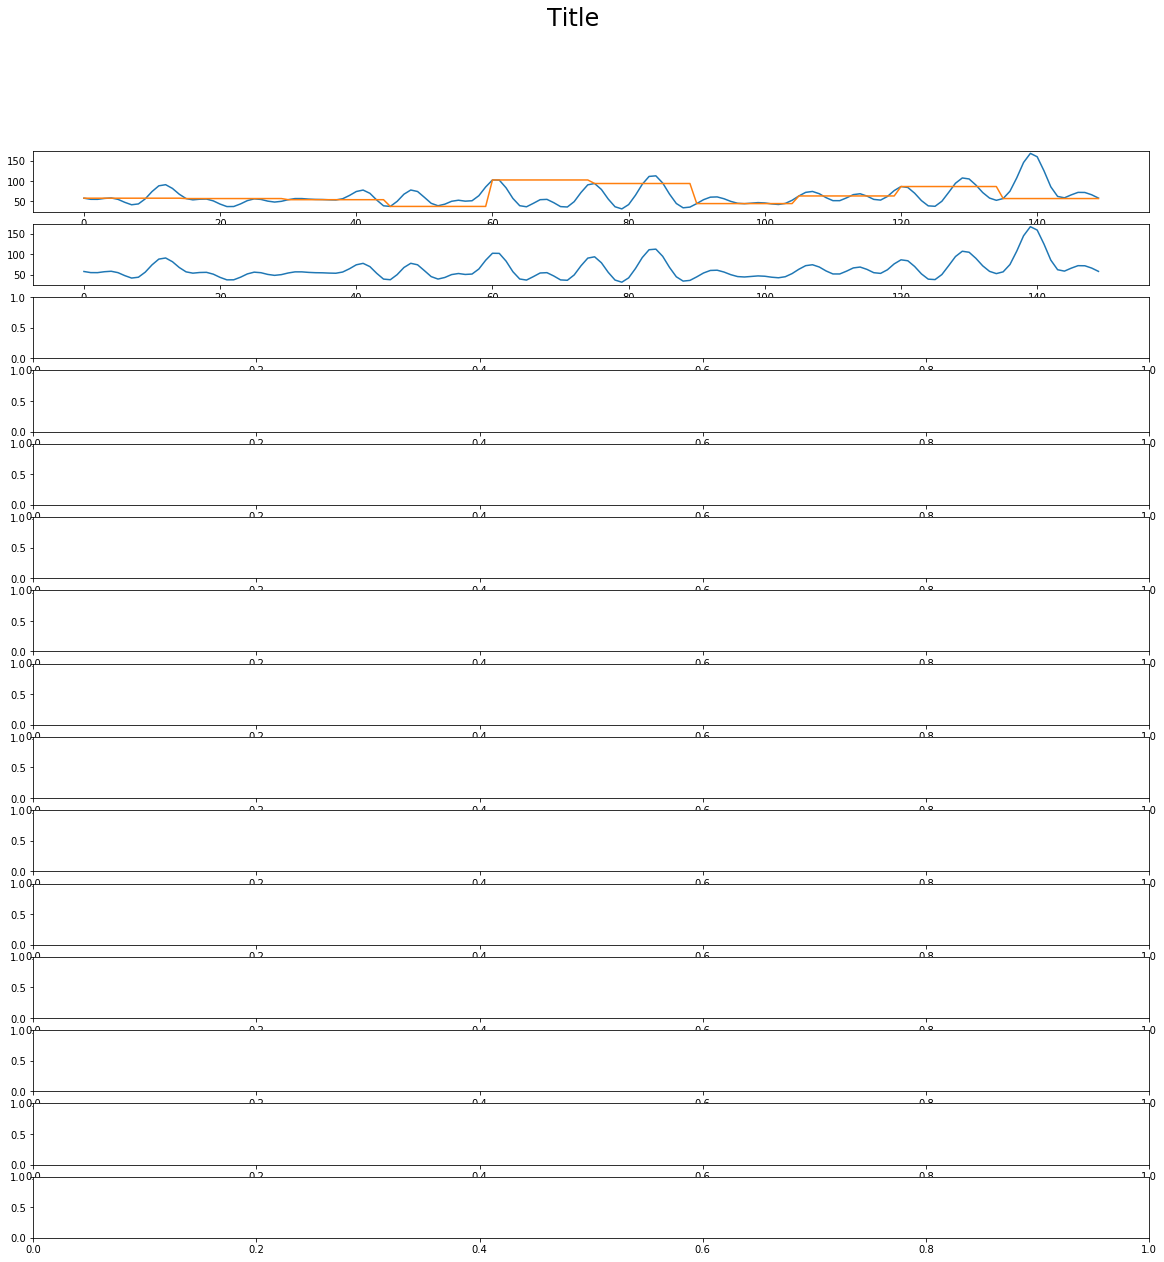

In [29]:
## VISUALISATION

# Plot
fig, axs = plt.subplots(sample_interval, figsize=(20,20))
fig.suptitle('Title', fontsize=24)

for i in range(sample_interval):
    axs[i].plot(x, y)
    axs[i].plot(x, sampled_ys[i])

#axs[2].set_xticks(np.arange(min(x), max(x), 10))

<ErrorbarContainer object of 3 artists>

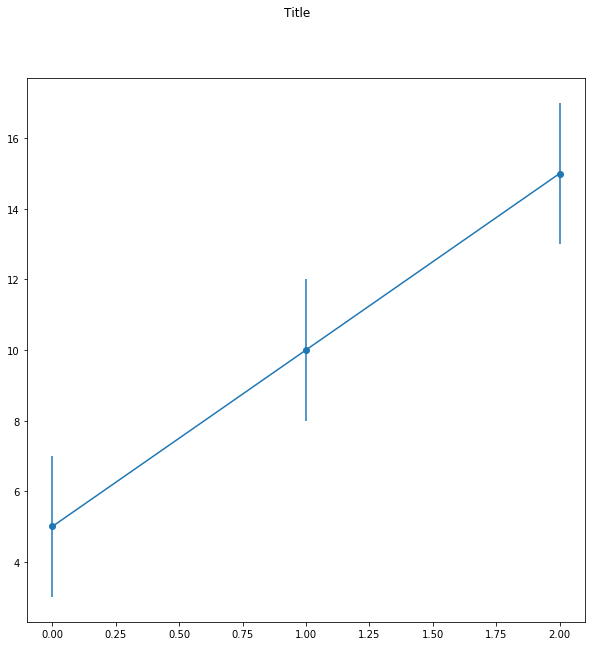

In [25]:
fig, axs = plt.subplots(1, figsize=(10,10))
fig.suptitle('Title')
axs.errorbar([0,1,2], [5,10,15], yerr=[2,2,2], fmt='-o')